### 광고에 소요되는 비용으로 클릭수 예측하기
- 25 → 332 규칙 학습
- 35 → 310 규칙 학습
- 49 → 325 규칙 학습
- 59 → 319 규칙 학습
- 85 → 308 규칙 학습...
- 사회조사에서의 데이터는 배수등의 사칙연산처럼 일정하지는 않음으로 오차가 필연적으로 발생

In [1]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [2]:
data=np.loadtxt('./click.csv', skiprows=1, delimiter=',', dtype=np.float64)
print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(20, 2)
[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [3]:
x_train = data[:, 0]
x_train

array([235., 216., 148.,  35.,  85., 204.,  49.,  25., 173., 191., 134.,
        99., 117., 112., 162., 272., 159., 159.,  59., 198.])

In [4]:
y_train = data[:, 1]
y_train

array([591., 539., 413., 310., 308., 519., 325., 332., 498., 498., 392.,
       334., 385., 387., 425., 659., 400., 427., 319., 522.])

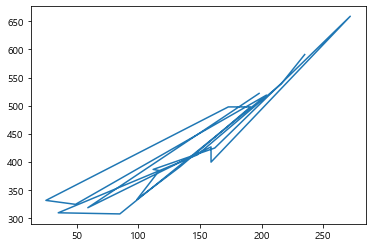

In [5]:
plt.plot(x_train, y_train)
plt.show()

In [6]:
data[:,0]

array([235., 216., 148.,  35.,  85., 204.,  49.,  25., 173., 191., 134.,
        99., 117., 112., 162., 272., 159., 159.,  59., 198.])

In [7]:
idx = data[:,0].argsort() # 원본 데이터의 값이 정렬이 된 값의 index, 0~ 
idx

array([ 7,  3,  6, 18,  4, 11, 13, 12, 10,  2, 17, 16, 14,  8,  9, 19,  5,
        1,  0, 15], dtype=int64)

In [9]:
print(data[7, :]) # 원본 데이터 index 7임으로 8번째 값
print(data[3, :]) # 원본 데이터 index 3임으로 4번째 값
print(data[6, :]) # 원본 데이터 index 6임으로 7번째 값
print(data)

[ 25. 332.]
[ 35. 310.]
[ 49. 325.]
[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [10]:
data[idx]

array([[ 25., 332.],
       [ 35., 310.],
       [ 49., 325.],
       [ 59., 319.],
       [ 85., 308.],
       [ 99., 334.],
       [112., 387.],
       [117., 385.],
       [134., 392.],
       [148., 413.],
       [159., 427.],
       [159., 400.],
       [162., 425.],
       [173., 498.],
       [191., 498.],
       [198., 522.],
       [204., 519.],
       [216., 539.],
       [235., 591.],
       [272., 659.]])

In [12]:
data[idx][::-1] # 내림차순 정렬

array([[272., 659.],
       [235., 591.],
       [216., 539.],
       [204., 519.],
       [198., 522.],
       [191., 498.],
       [173., 498.],
       [162., 425.],
       [159., 400.],
       [159., 427.],
       [148., 413.],
       [134., 392.],
       [117., 385.],
       [112., 387.],
       [ 99., 334.],
       [ 85., 308.],
       [ 59., 319.],
       [ 49., 325.],
       [ 35., 310.],
       [ 25., 332.]])

In [13]:
ds = data[idx]
ds

array([[ 25., 332.],
       [ 35., 310.],
       [ 49., 325.],
       [ 59., 319.],
       [ 85., 308.],
       [ 99., 334.],
       [112., 387.],
       [117., 385.],
       [134., 392.],
       [148., 413.],
       [159., 427.],
       [159., 400.],
       [162., 425.],
       [173., 498.],
       [191., 498.],
       [198., 522.],
       [204., 519.],
       [216., 539.],
       [235., 591.],
       [272., 659.]])

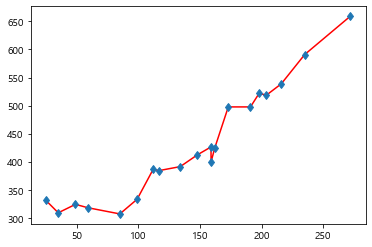

In [18]:
x_train = ds[:, 0]
y_train = ds[:, 1]
plt.plot(x_train, y_train, 'r')
plt.plot(x_train, y_train, 'd')
plt.show()

In [33]:
def train1(): # 손실 오차: 203567.7812
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                    epochs=100, batch_size=1)
    return model, hist

# model, hist = train1()

def train2(): # 손실 오차: 8529.4307
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                    epochs=300, batch_size=1)
    return model, hist

# model, hist = train2()

def train3(): # 손실 오차: 306.4969
    tf.random.set_seed(0) # 난수가 필요한 곳에 동일한 난수표 0번 적용
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                    epochs=300, batch_size=1)
    return model, hist

# model, hist = train3()

def train4(): # 손실 오차: 7050.8882
    tf.random.set_seed(1)
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                    epochs=300, batch_size=1)
    return model, hist

model, hist = train4()

# seed를 절대적으로 이용하면 안됨
# 현재 데이터가 빈약함으로 학습 영향을 쉽게 받음, 데이터를 증가시킬 필요가 있음
# AI는 빅데이터가 준비되면 정확도 또한 상승한다.

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 13ms/step - loss: 257444.0312 - val_loss: 716976.8750
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 332089.5294 - val_loss: 711413.1875
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 245242.5368 - val_loss: 706394.7500
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 339921.8143 - val_loss: 700463.7500
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 321355.2151 - val_loss: 695233.1250
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 302891.0349 - val_loss: 689985.062

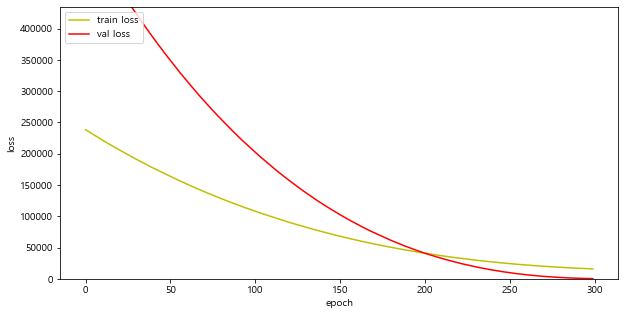

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 434714.3125]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [27]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([50, 120, 140, 160, 250])
print(x.shape)

(5,)


In [28]:
p=model.predict(x) # 모델 사용
print(p.shape)
print(p)

(5, 1)
[[150.4225 ]
 [353.02722]
 [410.91425]
 [468.80133]
 [729.29315]]


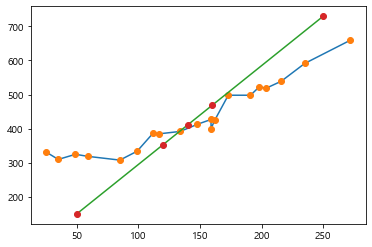

In [29]:
x_train = ds[:, 0]
y_train = ds[:, 1]
plt.plot(x_train, y_train)
plt.plot(x_train, y_train, 'o')
plt.plot(x, p)
plt.plot(x, p, 'o')
plt.show()

In [56]:
# 변수 1개를 가지고 매출액을 판단하는 것은 매우 특성이 부족함을 알 수 있다.
# 예) 자율 학습 시간 -> 성적
# 예) 자율 학습 시간 + 학원 + 온라인 강의 + 도서 독해 권수 -> 성적

In [34]:
model.save('./Click.h5') # h5 변경안됨.

In [35]:
model = load_model('./Click.h5')

In [38]:
pay = int(input('광고비를 입력하세요.'))
x = np.array([pay])
p=model.predict(x) # return 2차원
print('광고비 {0:,.0f}원 지출시 {1:,.0f}회 클릭수 발생'.format(pay, p[0][0]))

ValueError: invalid literal for int() with base 10: ''